Text(0, 0.5, 'Head (m)')

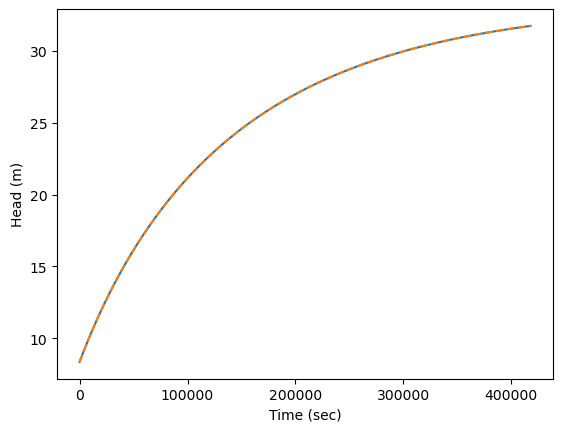

In [21]:
# import functions we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import root_scalar


# Define parameters
L = 1000 # m
f = 0.1 # unitless
D_H = 1. # m
A_R = 5000. #m^2
R_i = 1. #m^3/s
R_f = 2. #m^3/s
g = 9.8 # m^2/s
C_f = 1. + f*L/D_H
A_c = np.pi * D_H**2 / 4.

# set initial conditions and time array for solution
h_i = C_f/(2*g) * (R_i/A_c)**2
h_f = C_f/(2*g) * (R_f/A_c)**2
tau = A_R*C_f*R_f / (2*g*A_c**2)
t_end = tau*5
n = 500
t = np.linspace(0, t_end, n)

# Create function that calculates discharge
def Q(h):
    return A_c * np.sqrt(2*g*h/C_f)

# Create function that calculates dh_dt
def dh_dt(h, t, R):
    thisQ = Q(h)
    return (R - thisQ)/A_R

# Create a function for root finding of analytical solution
def ana(h, t_sol):
    Q_sol = Q(h)
    return t_sol - A_R*C_f/(g*A_c**2) * (-Q_sol + R_i - R_f*np.log(np.abs( (R_f - Q_sol) / (R_f - R_i) ) ) )

h_ana = np.zeros(n)
for i, t_sol in enumerate(t):
    # print(t_sol)
    if t_sol > 0:
        sol = root_scalar(ana, args=(t_sol,), bracket=(h_i, h_f))
        h_ana[i] = sol.root
h_ana[0] = h_i

# Solve using odeint
h = odeint(dh_dt, h_i, t, args=(R_f,))

# Plot the solution
plt.plot(t, h)
plt.plot(t, h_ana, '--')
plt.xlabel('Time (sec)')
plt.ylabel('Head (m)')

In [20]:
from scipy.optimize import root_scalar

# Create a function for root finding of analytical solution
def ana(h, t_sol):
    Q_sol = Q(h)
    return t_sol - A_R*C_f/(g*A_c**2) * (-Q_sol + R_i - R_f*np.log(np.abs( (R_f - Q_sol) / (R_f - R_i) ) ) )

h_ana = np.zeros(n)
for i, t_sol in enumerate(t):
    # print(t_sol)
    if t_sol > 0:
        sol = root_scalar(ana, args=(t_sol,), bracket=(h_i, h_f))
        h_ana[i] = sol.root
h_ana[0] = h_i

In [16]:
sol

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 8.373816241329589